# Importing the neccessary Libraies:

In [1]:
import pandas as pd
import datetime as dt
import matplotlib as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly
import plotly.express as px
from plotly.offline import init_notebook_mode, plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Reading the dataset:

In [2]:
#Reading and prinitng the dataset:

final_data=pd.read_csv("data_RFM.csv")
print(len(final_data))
final_data.head(5)

100


,cust_id,last_visit,no_of_visits,atp($)
0,1,2018-03-16T18:54:58.6700000,57,570
1,2,2018-02-23T22:19:23.7730000,36,360
2,3,2018-03-28T15:22:20.8230000,4,40
3,4,2018-03-01T12:36:36.5130000,33,330
4,5,2018-03-01T13:51:56.0830000,85,850


# Handling missing values:

In [3]:
#Dropping NANs:

final_data=final_data.dropna()
print(len(final_data))
final_data.head(5)

99


,cust_id,last_visit,no_of_visits,atp($)
0,1,2018-03-16T18:54:58.6700000,57,570
1,2,2018-02-23T22:19:23.7730000,36,360
2,3,2018-03-28T15:22:20.8230000,4,40
3,4,2018-03-01T12:36:36.5130000,33,330
4,5,2018-03-01T13:51:56.0830000,85,850


# Make neccessary datatype conversions in datetime:

In [4]:
#To convert string into datetime object to maintain consistancy in data:

final_data['last_visit'] = pd.to_datetime(final_data['last_visit'])
final_data.head(5)

,cust_id,last_visit,no_of_visits,atp($)
0,1,2018-03-16 18:54:58.670,57,570
1,2,2018-02-23 22:19:23.773,36,360
2,3,2018-03-28 15:22:20.823,4,40
3,4,2018-03-01 12:36:36.513,33,330
4,5,2018-03-01 13:51:56.083,85,850


# Create a RFM object:

In [6]:
#Define RFM object:

RFM= final_data.groupby('cust_id').agg({'last_visit': lambda date:  dt.datetime.now() - date,
                                            'no_of_visits': lambda num: num,
                                            'atp($)': lambda price: price})
RFM.head(5)

,last_visit,no_of_visits,atp($)
cust_id,,,
1,503 days 15:53:28.206342,57,570
2,524 days 12:29:03.104339,36,360
3,491 days 19:26:06.055337,4,40
4,518 days 22:11:50.365337,33,330
5,518 days 20:56:30.796335,85,850


# Rename all the columns:

In [7]:
# Rename all the columns as per data representation:

RFM.columns=['recency','frequency','monetary']

#Convert the recency data into DAYS(int) for further calculation:

RFM['recency'] = RFM['recency'].dt.days
RFM['recency']= RFM['recency'].astype(int)
RFM.head(5)

,recency,frequency,monetary
cust_id,,,
1,503,57,570
2,524,36,360
3,491,4,40
4,518,33,330
5,518,85,850


# Define the function for quartiles:

In [8]:
# Define the number of quartiles and order of quartiles:

#Define function:

def Quartile_creator(N):
#N: number of quartiles

    RFM['r_quartile'] = pd.qcut(RFM['recency'].rank(method='first'),N,list(range(1,N+1, 1)))
    RFM['f_quartile'] = pd.qcut(RFM['frequency'].rank(method='first'),N, list(range(N, 0, -1)))
    RFM['m_quartile'] = pd.qcut(RFM['monetary'].rank(method='first'),N ,list(range(N, 0, -1)))
    return RFM

In [9]:
#Calling the function and passing the quartiles number:

Quartile_creator(5)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
cust_id,,,,,,
1,503,57,570,1,3,3
2,524,36,360,3,4,4
3,491,4,40,1,5,5
4,518,33,330,2,4,4
5,518,85,850,2,1,1
6,558,97,970,5,1,1
7,539,64,640,4,2,2
8,528,10,100,3,5,5
9,519,42,420,2,3,3


# Make a new column showing all the quartiles values:

In [11]:
#Make a new column showing all the quartiles values

RFM['RFM_Score'] = RFM.r_quartile.astype(str)+ RFM.f_quartile.astype(str) + RFM.m_quartile.astype(str)
RFM.head(5)
#RFM.to_csv('RFM_Output.csv')

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
cust_id,,,,,,,
1,503,57,570,1,3,3,133
2,524,36,360,3,4,4,344
3,491,4,40,1,5,5,155
4,518,33,330,2,4,4,244
5,518,85,850,2,1,1,211


# Filter segments using RFM scores:

# First method:

In [12]:
#Creating different functions to filter different groups:

def Best_Customers() :
    Best_Customers=RFM[RFM['RFM_Score']=='111'].sort_values('monetary', ascending=False)
    print('List of Best customers who:')
    print('Purchase most recently,','most frequent and','spends the most')
    print('Marketing strategy:','New products and new programs offer')
    return Best_Customers

def Lost_Customers() :
    Lost_Customers=RFM[RFM['RFM_Score']=='411'].sort_values('monetary', ascending=False)
    print('List of Lost customers who:')
    print('Purchased a long ago,','but more frequent and','spends the most money')
    print('Marketing strategy:','price incentives')
    return Lost_Customers

def Almost_Lost_Customers() :
    Almost_Lost_Customers=RFM[RFM['RFM_Score']=='311'].sort_values('monetary', ascending=False)
    print('List of Almost Lost customers who:')
    print('Purchased a long ago,','but more frequent and','spends the most money')
    print('Marketing strategy:','price incentives')
    return Almost_Lost_Customers

def Lost_Cheap_Customers() :
    Lost_Cheap_Customers=RFM[RFM['RFM_Score']=='555'].sort_values('monetary', ascending=False)
    print('List of Lost and cheap customers who:')
    print('Purchased a long ago,','less frequent and','does not spend money')
    print('Marketing strategy:','Can simply ignore these customers')
    return Lost_Cheap_Customers

In [13]:
#Calling functions as per the need:

#Best_Customers()
#Lost_Cheap_Customers()
Lost_Customers()
#Almost_Lost_Customers()

List of Lost customers who:
Purchased a long ago, but more frequent and spends the most money
Marketing strategy: price incentives


,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
cust_id,,,,,,,
54,532,98,980,4,1,1,411
98,548,96,960,4,1,1,411
18,539,90,900,4,1,1,411
88,538,89,890,4,1,1,411
93,549,87,870,4,1,1,411
15,535,83,830,4,1,1,411


# Second method

# With Visualization:

In [14]:
#Grouping based on different Segments:

segment_map = { r'[1][1][1]': 'Best_Cust',
            r'[5][5][5]': 'Lost_Cheap_Cust',
            r'[2-3][1-3][1-3]': 'Almost_Lost_Cust',
            r'[3-5][1-5][1-5]': 'Lost_Cust',
            r'[1-5][1-5][1]': 'Best_Spenders',
            r'[1-5][1][1-5]': 'Most_Frequent',
            r'[1-2][1-5][1-5]': 'Loyal_Cust',
            r'[1-4][1-4][1-4]': 'Potential_Cust'
}

RFM['Segment'] = RFM.r_quartile.astype(str)+ RFM.f_quartile.astype(str)+RFM.m_quartile.astype(str)
RFM['Segment'] = RFM['Segment'].replace(segment_map, regex=True)
RFM.head(10)

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,Segment
cust_id,,,,,,,,
1,503,57,570,1,3,3,133,Loyal_Cust
2,524,36,360,3,4,4,344,Lost_Cust
3,491,4,40,1,5,5,155,Loyal_Cust
4,518,33,330,2,4,4,244,Loyal_Cust
5,518,85,850,2,1,1,211,Almost_Lost_Cust
6,558,97,970,5,1,1,511,Lost_Cust
7,539,64,640,4,2,2,422,Lost_Cust
8,528,10,100,3,5,5,355,Lost_Cust
9,519,42,420,2,3,3,233,Almost_Lost_Cust


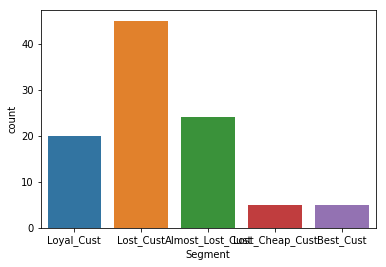

In [15]:
#Plotting the historgram:

sns.countplot(x='Segment', data=RFM);
plt.rc('figure', figsize = (12, 7))

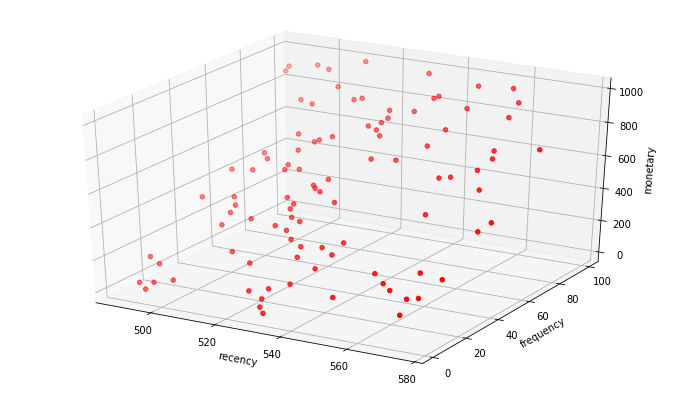

In [16]:
#Scatter plot based on recency, frequency,monetary

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =RFM['recency']
y =RFM['frequency']
z =RFM['monetary']

ax.scatter(x, y, z, c='r', marker='o')

#Defining names:
ax.set_xlabel('recency')
ax.set_ylabel('frequency')
ax.set_zlabel('monetary')

plt.show()